In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings   # importing libraries
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('/content/heart_disease.xlsx',sheet_name='Heart_disease')

#EDA

In [ ]:
df.head(5)

In [ ]:
df.shape
# there are total 908 rows and 13 columns in the dataset

In [ ]:
df.info()
# as we can see there are 6 numerical colums, 4 categorical clumns , 1 boolian value column



##check for missing values

In [ ]:
df.isna().sum()

In [ ]:
# there are missing values in the colum oldpeak
# so we are going to replace them with median
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)
df

In [ ]:
df.isna().sum() # now there are 0 mising values

## outliers

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
# checking outliers of numrical columns
# Create boxplot for selected numerical columns
plt.boxplot([df[col] for col in numerical_columns], labels=numerical_columns)

#Feature engineering

In [ ]:

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns
# getting categorical features

In [ ]:
categorical_features = ['sex', 'cp', 'restecg', 'exang', 'slope', 'thal']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True,dtype = int)

In [ ]:
df

## standardization

In [ ]:
# scaler = StandardScaler()  # creating instance of standardscaler() class as scaler

In [ ]:
# df.columns
# features_for_standardization = ['age', 'trestbps', 'chol','thalch']

In [ ]:
# df[features_for_standardization] = scaler.fit_transform(df[features_for_standardization])  # fitting and transforming at same time


In [ ]:
# df = pd.DataFrame(scaled_df, columns=df.columns)
df

## Splitting data into training and testing

In [ ]:
# Split the scaled DataFrame into training and testing sets
x = df[[col for col in df.columns if col != 'num']]
y = df['num']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##making decision tree model

In [ ]:
# Create a DecisionTreeClassifier instance with desired hyperparameters
model = DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
# Train the model using the training data
model.fit(x_train, y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Specify average for multiclass
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Specify average for multiclass
print(f"Recall: {recall}")

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Specify average for multiclass
print(f"F1-score: {f1}")




#Hyperparameter Tuning:

In [ ]:



# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, 20, 30 , None],  # Explore different maximum depths
    'min_samples_split': [2, 5, 10, 15,20,30,40],  # Explore different minimum samples to split a node
    'criterion': ['gini', 'entropy'],
    # Explore different split criteria
}

# Create a DecisionTreeClassifier instance
model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)  # Use 5-fold cross-validation

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(x_test)




# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


#Model Evaluation and Analysis:

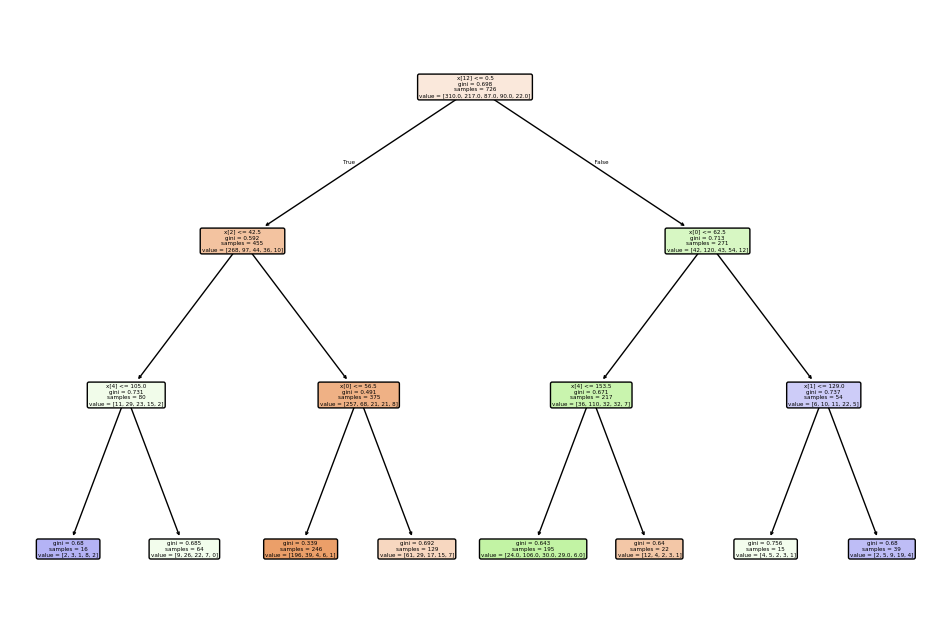

In [ ]:
from sklearn.tree import plot_tree

# Assuming 'best_model' is your trained Decision Tree model
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(best_model, filled=True, rounded=True)
plt.show()

#Interview Questions:


1>What are some common hyperparameters of decision tree models, and how do they affect the model's performance? give answer in 5-6 lines

ans.

max_depth -	Limits the tree's depth, preventing overfitting if set too high, underfitting if set too low.

min_samples_split	- Minimum samples needed to split a node. Higher values prevent overfitting but may underfit.

min_samples_leaf -	Minimum samples required in a leaf node. Similar effect to min_samples_split.

criterion	- Measures split quality (e.g., 'gini', 'entropy'). Impacts how the tree makes decisions.

max_features	- Number of features considered for each split. Can reduce overfitting if limited.

2> What is the difference between the Label encoding and One-hot encoding?

Label Encoding assigns a unique integer to each category in a categorical feature.

 One-Hot Encoding creates a new binary feature for each category, where a 1 indicates the presence of that category and 0 indicates its absence.